# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


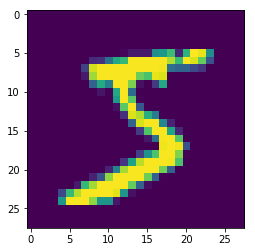

In [185]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [188]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [190]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [191]:
from keras.layers import Activation
model = Sequential()

#Built the model below to bring number of parameters down. Since its MNIST data, asuming at RC of 5,
#we can find all edges and gradients, have added the MaxPool Layer at RC of 5 and then added transition layer
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, activation='relu'))          
model.add(Convolution2D(10, 12))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys


In [192]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 12, 12, 8)         264       
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 1, 1, 10)          11530     
_________________________________________________________________
flatten_25 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [194]:
#Did some trial and error here with batch size. Since the kernel params gets 
#updated after netwoprk goes through each bacth. decreased the bacth size to 16 from 32 to get more accuracy.
#Looks like it worked well.
model.fit(X_train, Y_train, batch_size=16, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.1659 - acc: 0.9499
Epoch 2/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0642 - acc: 0.9808
Epoch 3/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0474 - acc: 0.9854
Epoch 4/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0378 - acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0315 - acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0262 - acc: 0.9915
Epoch 7/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0235 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0214 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.0185 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 18s 298us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [196]:
print(score)

[0.053559229279206554, 0.9872]


In [0]:
y_pred = model.predict(X_test)

In [198]:
print(y_pred[:9])
print(y_test[:9])

[[1.56455890e-15 1.18073812e-16 8.84651380e-12 1.20606637e-06
  4.82597797e-19 1.92439639e-15 3.39936674e-31 9.99998808e-01
  5.38314966e-12 4.36087527e-10]
 [5.54683686e-12 7.01830824e-12 1.00000000e+00 2.40649558e-12
  3.16721728e-18 7.34184971e-16 5.63221240e-11 1.44458564e-19
  1.07327226e-13 2.83417919e-14]
 [1.27091545e-12 9.99997497e-01 1.92985993e-07 4.78314277e-10
  2.18069613e-06 1.54661117e-09 7.70438824e-10 1.99640793e-09
  1.30357890e-07 2.65835218e-11]
 [1.00000000e+00 8.79353479e-19 4.97744779e-08 2.12710464e-13
  2.56368440e-13 3.29862209e-14 2.73944145e-10 1.20218039e-12
  7.34072358e-10 6.16735066e-11]
 [1.48457228e-13 1.00322659e-14 2.04170177e-13 1.64349593e-11
  9.99993682e-01 4.29427738e-17 1.93445490e-15 9.27937949e-10
  8.83771278e-09 6.34190746e-06]
 [2.20396092e-14 9.99999166e-01 1.68468173e-08 3.12234787e-11
  6.41989118e-07 1.54115110e-13 5.63439660e-12 1.73988013e-07
  3.12769366e-08 6.65926592e-10]
 [2.05949506e-18 2.91044033e-12 3.56724581e-06 7.34529174e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [200]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored